# Lecture 4 companion notebook

## Data Structures

Here a list of tuples providing a mapping from code numbers to descriptions drawn from a health study.

In [12]:
import numpy as np
exercise_coding = [(1, "everyday"), 
                   (2, "1 per week"), 
                   (4, "1-2 per month"),
                   (5, "never")]

In [2]:
exercise_coding

[(1, 'everyday'), (2, '1 per week'), (4, '1-2 per month'), (5, 'never')]

## Use of conditional for decoding

Embeds the data structure as code

In [3]:
def exercise(code):
    """Decode exercise code into descriptive string"""
    if code == 1:
        return "everyday"
    elif code == 2:
        return "1 per week"
    elif code == 4:
        return "1-2 per month"
    elif code == 5:
        return "never"
    else:
        return "unknown"

In [13]:
exercise(4)

'1-2 per month'

## Lookup to perform translation

Illustrates a typical use of global variables.  Code remains unchanged if mapping table was to be updated.

Example of the use of for loop with no recursion on the loop variable.

Also shows tuple binding in the for loop.

In [14]:
def exercise(code):
    """Decode exercise code into descriptive string"""
    for (code_num, description) in exercise_coding:
        if code == code_num:
            return description
    return "unknown"

In [15]:
for i in np.arange(6):
    print(exercise(i))

unknown
everyday
1 per week
unknown
1-2 per month
never


**Today's Challenge: Perfect Numbers**

A perfect number is a positive integer that is equal to the sum of its positive divisors, excluding itself

Unsolved problem in mathematics: Are there infinitely many perfect numbers

In [16]:
# First 10 perfect numbers
perfect_10 = [6, 28, 496, 8128, 33550336, 8589869056, 137438691328, 2305843008139952128, 2658455991569831744654692615953\
842176, 191561942608236107294793378084303638130997321548169216]

In [17]:
perfect_10

[6,
 28,
 496,
 8128,
 33550336,
 8589869056,
 137438691328,
 2305843008139952128,
 2658455991569831744654692615953842176,
 191561942608236107294793378084303638130997321548169216]

**Review: Function definition statement**
    
    def <fun_name>(<args>):
       <indented body statements>
       return <expression>

In [18]:
# Function definition
def divides(x,y):
    """ Return whether x divides y"""
    return y%x == 0

In [19]:
# Test it
divides(2,4)

True

In [20]:
# Review: List comprehesion with tuples
n = 16
[(i, n, divides(i,n)) for i in range(2,n)]

[(2, 16, True),
 (3, 16, False),
 (4, 16, True),
 (5, 16, False),
 (6, 16, False),
 (7, 16, False),
 (8, 16, True),
 (9, 16, False),
 (10, 16, False),
 (11, 16, False),
 (12, 16, False),
 (13, 16, False),
 (14, 16, False),
 (15, 16, False)]

In [21]:
# Review: simple FOR loop - linear recursion on the iteration variables
def sum(seq):
    partial_sum = 0             # Initialize the loop variable
    for element in seq:         # iterate over each element in a sequence
        partial_sum += element  # Update the loop variable as function of old and current element
    return partial_sum          # Use the final result

In [22]:
sum([1,2,3,4])

10

Put several concepts together:
- For loop that builds a list by concatenation, conditionally
- using our divides function

In [23]:
# A more sophisticaed FOR loop with append instead of addition
def divisors(n):
    divisor_list = []           # Initialize loop variable to the empty list
    for i in range(1,n):        # Each element in a range 1, ..., n-1
        if divides(i,n):        # Update by appending to the list with "+"
            divisor_list = divisor_list + [i]
    return divisor_list

In [24]:
divisors(24)

[1, 2, 3, 4, 6, 8, 12]

In [25]:
# loop comprehension with a filter
def divisors(n):
    return [i for i in range(1,n) if divides(i,n)]

In [26]:
divisors(24)

[1, 2, 3, 4, 6, 8, 12]

Now we are ready to put it together and determine if a number is a perfect number

In [27]:
def perfect(v):
    return sum(divisors(v)) == v

In [28]:
perfect(6)

True

**Iteration - while statement**

   ```
    <initialization statement>
    while <predicate expression>:
        <body statements>
    <rest of the program>
    ```
   

In [29]:
def perfect_numbers(k):
    """Return the first k perfect numbers"""
    perfect_count = 0
    perfects = []
    n = 1
    while perfect_count < k:
        n += 1
        if perfect(n):
            print("got ", n)
            perfects += [n]
            perfect_count += 1
    return perfects

In [30]:
perfect_numbers(3)

got  6
got  28
got  496


[6, 28, 496]

# Functions as Values

In [31]:
pi = 3.1415

In [32]:
pi

3.1415

In [33]:
# Functions are "values" to
sum

<function __main__.sum(seq)>

In [34]:
# What can we do with them?
sum+2

TypeError: unsupported operand type(s) for +: 'function' and 'int'

Apply them to arguments

In [35]:
sum([1,2,3])

6

In [36]:
# use them in expressions
[i for i in range(30) if divides(2,i)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

Some handy functions

In [39]:
def identity(x):
    return x

def four(x):
    return 4

def odd(x):
    return x%2 == 1

def increment(x):
    return x + 1

def triple(x):
    return 3 * x

def square(x):
    return x * x

def sqrt(x):
    return x**(1/2)

Function composition

In [40]:
increment(square(2))
print (odd(5))

True


In [41]:
square(increment(2))

9

# Functions as arguments

In [42]:
def double_fun(f, x):
    return f(f(x))

In [43]:
double_fun(square, 2)

16

In [44]:
# Higher order function that takes function inputs
def compose(f,g,x):
    return f(g(x))

In [45]:
compose(square, increment, 2)

9

In [46]:
compose(increment, square, 2)

5

# Assigning functions to variables

In [47]:
x = sum

In [48]:
x

<function __main__.sum(seq)>

In [49]:
x([4,5,6])

15

# Mapping a function over a sequence

In [50]:
def map(f,seq):
    return [f(x) for x in seq]

In [51]:
map(square, [1,2,3,4])

[1, 4, 9, 16]

In [52]:
map(odd, range(1,10))

[True, False, True, False, True, False, True, False, True]

In [53]:
map(exercise, [0,4, 1, 2, 2])

['unknown', '1-2 per month', 'everyday', '1 per week', '1 per week']

# Filter - important variant on map

In [54]:
def filter(f,seq):
    return [x for x in seq if f(x)]

In [55]:
filter(odd, range(23))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [56]:
filter(perfect, range(2,500))

[6, 28, 496]

# Reduce - combine sequences down to sclars

In [57]:
divisors(28)

[1, 2, 4, 7, 14]

In [58]:
# Reduction under an operator needs an identity element to get started
def sum(seq):
    res = 0
    for element in seq:
        res = res + element
    return res

def my_prod(seq):
    res = 1
    for element in seq:
        res = res * element
    return res

In [59]:
sum(divisors(28))

28

In [60]:
def reduce(fun, seq, identity):
    res = identity
    for element in seq:
        res = fun(res, element)
    return res

In [61]:
from operator import add, mul

In [62]:
reduce(add, [1, 2, 4, 7, 14], 0)

28

In [63]:
reduce(mul, [1, 2, 4, 7, 14], 1)

784

In [64]:
map(square,[1,2,3,4])

[1, 4, 9, 16]

In [65]:
reduce(add, map(square, [1,2,3,4]), 0)

30

In [66]:
def sum_of_squares(n):
    return reduce(add, map(square, range(1,n+1)), 0)

In [67]:
sum_of_squares(4)

30

In [68]:
def perfect(n):
    return reduce(add, divisors(n), 0) == n

In [69]:
perfect(6)

True

# Partner discussion

In [70]:
def split_fun(p, s):
    """ Returns <YOU FILL THIS IN>
    """
    return [i for i in s if p(i)], [i for i in s if not p(i)]

In [71]:
split_fun(leq_maker(3), [0, 1, 6, 3, 2, 5])

NameError: name 'leq_maker' is not defined

# Higher Order Functions as Function factories

## functions as return values

### A threshold filter?

In [72]:
def leq_maker(threshold):
    def leq(val):                 # define a function in the environment inside
        return val <= threshold
    return leq                    # return the function we just made

In [73]:
leq_maker

<function __main__.leq_maker(threshold)>

In [74]:
leq_maker(3)

<function __main__.leq_maker.<locals>.leq(val)>

In [75]:
le3 = leq_maker(3)

In [76]:
map(le3, range(10))

[True, True, True, True, False, False, False, False, False, False]

In [77]:
filter(le3, [1, 10, 2, 3, 0, -2])

[1, 2, 3, 0, -2]

[Python Tutor Example](https://goo.gl/TQKeS9)

```
def square(x):
    return x*x

def doubler(fun):
    def dbl_mkr(x):
        return fun(fun(x))
    return dbl_mkr

x = doubler(square)(3)
```

## Higher order functions as computational models

Remember the equation for a line: y = m*x + b

In [78]:
# A function that computes that expression
def liner(m, x, b):
    return m*x + b

In [79]:
[liner(2, x, 1) for x in range(10)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [80]:
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np

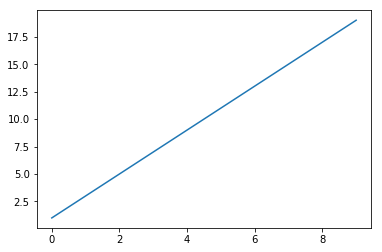

In [81]:
plots.plot([liner(2, x, 1) for x in range(10)])

For a any slope and intercept, manufacture a function that computes the line

In [82]:
def linemaker(m, b):
    def linefun(x):
        return m*x + b   # Create a function that embeds the parameters of the line
    return linefun       # Return that dynamically created function

In [83]:
myline = linemaker(2,1)

[myline(x) for x in range(10)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

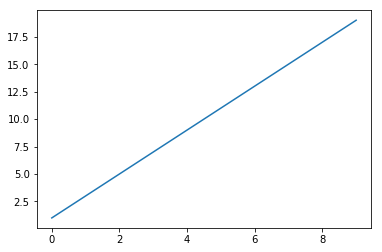

In [84]:
plots.plot(map(myline, range(10)))

## Higher order functions to embed data structures

For any lookup table of (code, desc) pairs, manufacture a decoder function

In [85]:
def make_decoder(code_map):
    """Make a decoder function specified by a map"""
    def decode(code):
        for (code_num, desc) in code_map:
            if code == code_num:
                return desc
        return "unknown"
    return decode

In [86]:
myexercise = make_decoder(exercise_coding)

In [87]:
myexercise

<function __main__.make_decoder.<locals>.decode(code)>

In [88]:
myexercise(2)

'1 per week'

In [89]:
map(exercise, [0,4, 1, 2, 2])

['unknown', '1-2 per month', 'everyday', '1 per week', '1 per week']

In [90]:
map(myexercise, [0,4, 1, 2, 2])

['unknown', '1-2 per month', 'everyday', '1 per week', '1 per week']

## Another example

In [91]:
def divides_maker(n):
    def fun(i):
        return divides(i,n)
    return fun

In [92]:
divides_maker(28)

<function __main__.divides_maker.<locals>.fun(i)>

In [93]:
map(divides_maker(28), range(1,28))

[True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [94]:
filter(divides_maker(28), range(1,28))

[1, 2, 4, 7, 14]

In [95]:
sum(filter(divides_maker(28), range(1,28)))

28

In [96]:
reduce(add, filter(divides_maker(28), range(1,28)), 0)

28

In [97]:
def perfect(n):
    return reduce(add, filter(divides_maker(n), range(1,n)), 0) == n

In [98]:
perfect(28)

True

## Have fun in lab